In [1]:
import pandas as pd
import numpy as np
import requests as requests
from IPython.core.display import HTML
from bs4 import BeautifulSoup, UnicodeDammit
import StringIO
import logging
import time
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
s = requests.Session()

In [96]:
link = 'https://public.cdpehs.com/NCENVPBL/INSPECTION/ShowESTABLISHMENTPage.aspx'
payload = {'ESTABLISHMENT':129779, 'esttst_cty':60}
#payload = {'ESTABLISHMENT':121890, 'esttst_cty':60}
z = s.get(link, params=payload)
soup = BeautifulSoup(z.content, from_encoding='UTF-8')

In [100]:
t = soup.findAll('table')[0]
r = t.findAll('td', attrs={'class':'dfv'})
rest_info = [x.text for x in r]
rest_info = [rest_info[x] for x in [0,2,8,9,10,16,19]]

insp_info = np.array([y.text for y in t.findAll('td', attrs={'class':'ttc'})]).reshape(-1,4)

In [107]:
def get_page_info(id_no, s=None):
    if s is None:
        s = requests.Session()
    link = 'https://public.cdpehs.com/NCENVPBL/INSPECTION/ShowESTABLISHMENTPage.aspx'
    payload = {'ESTABLISHMENT':id_no, 'esttst_cty':60}
    z = s.get(link, params=payload)
    soup = BeautifulSoup(z.content, from_encoding='UTF-8')
    
    t = soup.findAll('table')[0]
    
    insp_info = np.array([y.text for y in t.findAll('td', attrs={'class':'ttc'})]).reshape(-1,4)
    
    if insp_info.shape[0] < 1:
        return None
    
    r = t.findAll('td', attrs={'class':'dfv'})
    rest_info = [x.text for x in r]
    
    return {'name'       :rest_info[0],
            'address'    :rest_info[2],
            'city'       :rest_info[8],
            'state'      :rest_info[9],
            'zip'        :rest_info[10],
            'type'       :rest_info[16],
            'county'     :rest_info[19],
            'inspections':insp_info}

def save_to_pickle(data, fname):
    with open(fname, 'wb') as handle:
        pickle.dump(data, handle)
        
def merge_two_dicts(x, y):
    '''Given two dicts, merge them into a new dict as a shallow copy.'''
    z = x.copy()
    z.update(y)
    return z

In [108]:
dicts_main = {}

In [163]:
def get_pages_in_range(start, n_loops, step_size=1000):
    s = requests.Session()
    dicts_main = {}
    for i in xrange(n_loops):
        dicts_loop = {}
        print '[%02d] START: %d' % (i, start)
        for i in xrange(step_size):
            dicts = get_page_info(start, s)
            if dicts is not None and dicts['type'][:3]=='1 -':
                dicts_loop[start] = dicts
                print '%d has %d inspections' % (start, dicts['inspections'].shape[0])
            start += 1
        save_to_pickle(dicts_loop, 'data/char/char_%s.pkl' % (start-1))
        dicts_main = merge_two_dicts(dicts_main, dicts_loop)
    return dicts_main
    

[00] START: 140000
[01] START: 141000
[02] START: 142000
[03] START: 143000
[04] START: 144000
144368 has 4 inspections
144382 has 2 inspections
144396 has 5 inspections
144401 has 7 inspections
144402 has 2 inspections
144421 has 1 inspections
144422 has 5 inspections
144438 has 6 inspections
144482 has 5 inspections
144522 has 9 inspections
144532 has 7 inspections
144543 has 7 inspections
144546 has 4 inspections
144599 has 6 inspections
144600 has 4 inspections
144601 has 6 inspections
144603 has 7 inspections
144619 has 5 inspections
144620 has 4 inspections
144621 has 5 inspections
144637 has 6 inspections
144674 has 6 inspections
144675 has 6 inspections
144712 has 8 inspections
144735 has 4 inspections
144740 has 1 inspections
[05] START: 145000


In [163]:
start = 140000
s = requests.Session()

for i in xrange(6):
    dicts_loop = {}
    print '[%02d] START: %d' % (i, start)
    for i in xrange(1000):
        dicts = get_page_info(start, s)
        if dicts is not None and dicts['type'][:3]=='1 -':
            dicts_loop[start] = dicts
            print '%d has %d inspections' % (start, dicts['inspections'].shape[0])
        start += 1
    save_to_pickle(dicts_loop, 'data/char_%s.pkl' % (start-1))
    dicts_main = merge_two_dicts(dicts_main, dicts_loop)
    

[00] START: 140000
[01] START: 141000
[02] START: 142000
[03] START: 143000
[04] START: 144000
144368 has 4 inspections
144382 has 2 inspections
144396 has 5 inspections
144401 has 7 inspections
144402 has 2 inspections
144421 has 1 inspections
144422 has 5 inspections
144438 has 6 inspections
144482 has 5 inspections
144522 has 9 inspections
144532 has 7 inspections
144543 has 7 inspections
144546 has 4 inspections
144599 has 6 inspections
144600 has 4 inspections
144601 has 6 inspections
144603 has 7 inspections
144619 has 5 inspections
144620 has 4 inspections
144621 has 5 inspections
144637 has 6 inspections
144674 has 6 inspections
144675 has 6 inspections
144712 has 8 inspections
144735 has 4 inspections
144740 has 1 inspections
[05] START: 145000


In [164]:
save_to_pickle(dicts_main, 'data/char/char_FULL_04.pkl')

In [113]:
save_to_pickle(dicts_loop, 'data/char_%s.pkl' % (start-1))
dicts_main = merge_two_dicts(dicts_main, dicts_loop)

In [165]:
test = pd.DataFrame.from_records(dicts_main).T

In [166]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 122131 to 168863
Data columns (total 8 columns):
address        2920 non-null object
city           2920 non-null object
county         2920 non-null object
inspections    2920 non-null object
name           2920 non-null object
state          2920 non-null object
type           2920 non-null object
zip            2920 non-null object
dtypes: object(8)
memory usage: 205.3+ KB


In [167]:
test.tail()

,address,city,county,inspections,name,state,type,zip
168590,10901 UNIVERSITY CITY BLVD SUITE 14 \r\n,CHARLOTTE,Mecklenburg,"[[10/1/2015, 98.50, A, 2490]]",CICI'S PIZZA #353,NC,1 - Restaurant,28213
168591,14318 RIVERGATE VIEW DR \r\n,CHARLOTTE,Mecklenburg,"[[10/21/2015, 98.50, A, 2134]]",MOD PIZZA RIVERGATE,NC,1 - Restaurant,28273
168653,929 PARK CENTER DR \r\n,MATTHEWS,Mecklenburg,"[[10/20/2015, 95.50, A, 2222]]",WAYBACK BURGERS #135,NC,1 - Restaurant,28105
168849,3100 CENTRAL AVE \r\n,CHARLOTTE,Mecklenburg,"[[10/9/2015, 96, A, 2498]]",ADAMARY'S RESTAURANTE Y PUPUSERIA,NC,1 - Restaurant,28205
168863,14027 CONLAN CIRCLE \r\n,CHARLOTTE,Mecklenburg,"[[10/9/2015, 84, B, 2365]]",PERSIS BIRYANI INDIAN GRILL,NC,1 - Restaurant,28277


In [144]:
with open('Establishment.html') as f:
    html_str = f.read()
soup_test = BeautifulSoup(html_str, 'html.parser')

In [145]:
test2 = soup_test.findAll('td', attrs={'class':'ttc'})

In [146]:
test_df = pd.DataFrame(np.array([x.text for x in test2]).reshape(-1,6), columns=['name','address','city','state','zip','type'])

In [168]:
out = set(test_df['name'].values) - set(test['name'].values)

In [169]:
len(out)

18

In [170]:
out

{u"ANGRY ALE'S ",
 u"ANTONIO'S PIZZA ",
 u"BJ'S MEMBERSHIP CLUB #375 FOOD COURT ",
 u'C TOWN EXPRESS RESTAURANT ',
 u"CICI'S PIZZA #674 ",
 u'DUNKIN DONUTS/BASKIN ROBBINS #342490 ',
 u'GUSTO PASTA BAR ',
 u'HOT TACO ',
 u'JAMBA JUICE ',
 u'LAWRENCE CARIBBEAN ',
 u'MI TIERRITA ',
 u"NATALEIGH'S ",
 u'PINTVILLE CRAFT BEER ',
 u'PURE PIZZA ',
 u'SUGAR HANDMADE GOURMET DONUTS ',
 u'TIAA-BETSILL #30761 ',
 u'TIMES BUFFET HIBACHI & SUHSI ',
 u'VILLAGE INN PIZZA '}

In [173]:
test[test.name.apply(lambda x: x[:4])=='CICI']

,address,city,county,inspections,name,state,type,zip
124943,1804 WINDSOR SQUARE DR \r\n,MATTHEWS,Mecklenburg,"[[8/6/2014, 91, A, 2222], [12/9/2013, 94.50, A...",CICI'S PIZZA #205,NC,1 - Restaurant,28105
124974,10707 PARK RD \r\n,CHARLOTTE,Mecklenburg,"[[7/6/2015, 93, A, 2465], [2/12/2015, 90, A, 2...",CICI'S PIZZA #150,NC,1 - Restaurant,28210
126009,10901 UNIVERSITY CITY BV \r\n,CHARLOTTE,Mecklenburg,"[[6/9/2015, 92.50, A, 2159], [8/12/2014, 93, A...",CICI'S PIZZA #353,NC,1 - Restaurant,28213
127494,10823 JOHN PRICE RD \r\n,CHARLOTTE,Mecklenburg,"[[8/17/2015, 90.50, A, 2118], [8/6/2015, 88.50...",CICI`S PIZZA #674,NC,1 - Restaurant,28273
163959,1804 WINDSOR SQUARE DRIVE \r\n,MATTHEWS,Mecklenburg,"[[9/2/2015, 88, B, 2174], [3/3/2015, 94, A, 19...",CICI'S #205,NC,1 - Restaurant,28105
168590,10901 UNIVERSITY CITY BLVD SUITE 14 \r\n,CHARLOTTE,Mecklenburg,"[[10/1/2015, 98.50, A, 2490]]",CICI'S PIZZA #353,NC,1 - Restaurant,28213


In [45]:
def build_restaurants(fname):
    dict_final = pickle.load(open(fname,'rb'))
    R = pd.DataFrame.from_records(dict_final).T
    R = R[R.type == '1 - Restaurant']
    R.loc[:,'address'] = R.address.apply(lambda x: x.replace(' \r\n',''))
    return R
    
def build_inspections(R):
    d = []
    for id_ in R.index:
        for row in R.loc[id_,'inspections']:
            d.append((id_,) + tuple(row))
    I = pd.DataFrame(d, columns=['id','date','score','grade','inspector'])
    I['date'] = pd.to_datetime(I['date'])
    I.loc[I.score==u'\xa0','score'] = 'NaN'
    I.score = I.score.astype(float)
    return I

def get_data(fname):
    R = build_restaurants(fname)
    I = build_inspections(R)
    R.drop('inspections', axis=1, inplace=True)
    return R, I


In [46]:
R, I = get_data('data/char/char_FULL_04.pkl')
R.info()
I.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2707 entries, 122131 to 168863
Data columns (total 7 columns):
address    2707 non-null object
city       2707 non-null object
county     2707 non-null object
name       2707 non-null object
state      2707 non-null object
type       2707 non-null object
zip        2707 non-null object
dtypes: object(7)
memory usage: 169.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12491 entries, 0 to 12490
Data columns (total 5 columns):
id           12491 non-null int64
date         12491 non-null datetime64[ns]
score        12482 non-null float64
grade        12491 non-null object
inspector    12491 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 585.5+ KB


In [42]:
I.groupby('grade').describe()

id         score
grade                                   
      count      12.000000      3.000000
      mean   127689.750000     66.000000
      std      2700.499992      3.041381
      min    122223.000000     64.000000
      25%    126992.000000     64.250000
      50%    128844.000000     64.500000
      75%    129588.500000     67.000000
      max    129773.000000     69.500000
A     count   12162.000000  12162.000000
      mean   131422.861043     96.011799
      std     10138.546104      2.221394
      min    122131.000000     90.000000
      25%    126557.000000     95.000000
      50%    128348.000000     96.500000
      75%    129480.000000     97.500000
      max    168849.000000    100.000000
B     count     300.000000    300.000000
      mean   132373.400000     85.750000
      std     10599.281969      2.231014
      min    122256.000000     80.000000
      25%    127175.500000     84.375000
      50%    128845.500000     86.000000
      75%    129627.500000     87.500000
      max    168863.000000     89.500000
C     count      17.000000     17.000000
      mean   140179.235294     75.117647
      std     14552.207339      3.038963
      min    125535.000000     70.000000
      25%    129246.000000     72.000000
      50%    129524.000000     76.000000
      75%    155197.000000     77.500000
      max    161572.000000     79.000000

In [38]:
I.score.astype(float)

0        90.0
1        93.0
2        96.0
3        91.0
4        91.0
5        90.0
6        93.5
7        95.0
8        97.0
9        94.5
10       97.0
11       98.5
12       97.5
13       96.0
14       96.0
15       93.0
16       96.5
17       95.5
18       96.0
19       98.5
20       95.5
21       95.5
22       96.5
23       94.0
24       96.0
25       98.0
26       98.0
27       98.5
28       97.0
29       97.0
         ... 
12461    97.0
12462    93.0
12463    96.0
12464    97.5
12465    96.5
12466    95.5
12467    99.0
12468    95.5
12469    94.5
12470    99.0
12471    99.5
12472    98.0
12473    94.0
12474    95.0
12475    98.0
12476    99.0
12477    94.0
12478    97.0
12479    95.5
12480    91.5
12481    94.0
12482    97.5
12483    97.5
12484    97.0
12485    91.5
12486    98.5
12487    98.5
12488    95.5
12489    96.0
12490    84.0
Name: score, dtype: float64

for row in x['inspections']:
    print tuple(row)

In [197]:
(1,) + tuple(row)

(1, u'10/2/2013', u'96', u'A', u'2174')

In [188]:
x['address']

u'231 E WOODLAWN RD '

In [47]:
15/23.*500.

326.0869565217391

In [48]:
326./60.

5.433333333333334

In [50]:
R1 = pickle.load(open('data/phx/phoenix_R_0199.pkl'))
R2 = pickle.load(open('data/phx/phoenix_R_0200.pkl'))

In [51]:
R1.tail(10)

,address,cutting_edge,link,name,permit_id
490,1542 W University Dr Mesa 85201,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Parilla Los Picos,FD-02563
491,1159 E Southern Ave Mesa 85204,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Walgreens No 3670,FD-02564
492,3201 N Hayden Rd Scottsdale 85251,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Kiddie Kampus,FD-02565
493,15585 N 91st Ave Peoria 85382,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Desert Harbor Elementary School,FD-02566
494,7059 E Baseline Rd Mesa 85208,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Walgreens No 3728,FD-02567
495,744 E Broadway Rd Mesa 85204,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Mesa Food & Deli,FD-02569
496,24218 S Oakwood Blvd Sun Lakes 85248,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Oakwood Country Club,FD-02570
497,4259 W Mcdowell Rd Phoenix 85009,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Circle K Store No 2705407,FD-02572
498,4259 W Mcdowell Rd Phoenix 85009,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Circle K Store No 2705407,FD-02573
499,7851 E Mcdowell Rd Scottsdale 85257,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,French's Meat Shoppe Inc,FD-02574


In [52]:
R2.tail(10)

,address,cutting_edge,link,name,permit_id
0,75 W Baseline Rd Suite 12 Gilbert 85234,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Mesquite Grill,FD-02576
1,3401 S 43rd Ave Phoenix 85009,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Kay's Kafe,FD-02577
2,4934 E Shea Blvd Scottsdale 85254,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Superpumper No 1,FD-02578
3,4201 N Scottsdale Rd Scottsdale 85251,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Sees Candy Shop AZ 6,FD-02579
4,1221 S Westwood Mesa 85210,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Marriott Courtyard,FD-02581
5,12601 W Bell Rd Surprise 85374,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Burger King No 5915,FD-02582
6,1445 S Power Rd Mesa 85208,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,K Mart No 7655,FD-02584
7,1445 S Power Rd Mesa 85208,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,K Mart No 7655,FD-02585
8,8515 N 51st Ave Glendale 85302,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,American Child Care Center,FD-02586
9,6661 W Bell Rd Suite 104 Glendale 85308,,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,Caramba Mexican Food,FD-02588


In [54]:
R2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 5 columns):
address         10 non-null object
cutting_edge    10 non-null object
link            10 non-null object
name            10 non-null object
permit_id       10 non-null object
dtypes: object(5)
memory usage: 480.0+ bytes


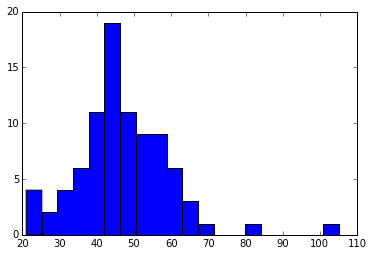

In [56]:
t = np.array([38, 37, 60, 59, 56, 43, 30, 38, 40, 53, 34, 64, 41, 51, 43, 47, 48, 62, 42, 46, 57, 32, 39, 45, 34, 59, 42, 54, 22, 24, 21, 55, 47, 43, 47, 45, 83, 105, 44, 39, 23, 33, 43, 36, 61, 45, 29, 48, 56, 39, 40, 45, 50, 43, 28, 44, 38, 32, 36, 54, 46, 48, 56, 48, 56, 57, 55, 51, 38, 38, 45, 50, 60, 50, 51, 44, 36, 58, 46, 52, 49, 66, 51, 46, 69, 65, 52])
plt.hist(t, bins=20);

https://elam.cityofmadison.com/HealthInspections/Estab.aspx
click New Search
